# Classifying MNIST digits with a convolutional neural network
In this notebook, we'll classify digits with a CNN, this will be very similar to the [dense MNIST](../mnist-dense/mnist-dense.ipynb) notebook, but hopefully we'll achieve much better test accuracy.

### Import libraries

In [1]:
import os
import sys
import pickle
import gzip

import wget
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Get MNIST dataset

In [2]:
dir_path = os.path.dirname(os.path.realpath('__file__')) # absolute path of notebook
dataset_path = os.path.join(dir_path, "../data/mnist.pkl.gz")
if not os.path.exists(dataset_path):
    print('Downloading dataset with wget module...')
    if not os.path.exists(os.path.join(dir_path, '../data')):
        os.mkdir(os.path.join(dir_path, '../data'))
    url = 'http://ericjmichaud.com/downloads/mnist.pkl.gz'
    wget.download(url, dataset_path)  
print('Download failed') if not os.path.exists(dataset_path) else print('Dataset acquired')
f = gzip.open(dataset_path, 'rb')
mnist = pickle.load(f)
f.close()
print('Loaded data to variable `mnist`')

Dataset acquired
Loaded data to variable `mnist`


## MNIST dataset documentation
`mnist` is a list of 70000 tuples of the form `(image, label)`. The images are NumPy arrays of shape `(784,)`, which represent 28x28 images, and whose values are floats between 0 and 1. The labels are one-hot vectorized representations of the digits, with shape `(10,)`. In a tuple whose image depicts a 0, the label would look like `np.array([1, 0, 0 ...])`. Here are some images from the dataset:

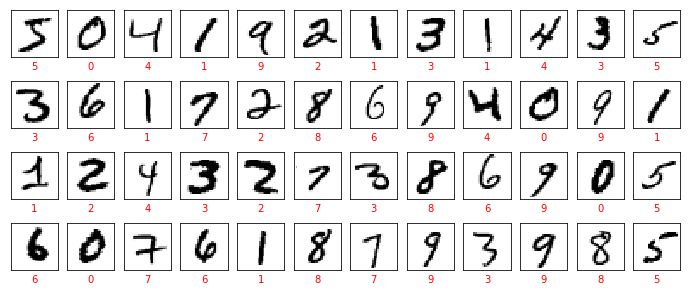

In [3]:
plt.figure(figsize=(12, 5))
for i in range(48):
    plt.subplot(4, 12, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist[i][0].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(str(np.argmax(mnist[i][1])), color='red')

### Partition dataset

In [4]:
training, validation, test = mnist[:50000], mnist[50000:60000], mnist[60000:70000]
imgs, lbs = zip(*mnist)
imgs = np.array(imgs)
lbs = np.array([np.argmax(l) for l in lbs])
training_imgs, validation_imgs, test_imgs = imgs[:50000], imgs[50000:60000], imgs[60000:70000]
training_lbs, validation_lbs, test_lbs = lbs[:50000], lbs[50000:60000], lbs[60000:70000]

### Declare model

In [5]:
model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
    keras.layers.Conv2D(64,
                        kernel_size=(5, 5), 
                        strides=(1, 1),
                        activation=tf.nn.relu),
                        # input_shape=(28, 28)),
    keras.layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2)),
    keras.layers.Conv2D(128,
                        kernel_size=(3, 3),
                        activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(training_imgs, training_lbs, epochs=8)

test_loss, test_acc = model.evaluate(test_imgs, test_lbs)
print('Test accuracy:', test_acc)

Epoch 1/8
12576/50000 [======>.......................] - ETA: 1:30 - loss: 0.2381 - acc: 0.9250

KeyboardInterrupt: 

### Wow pretty good! Let's see what it misclassifies now...

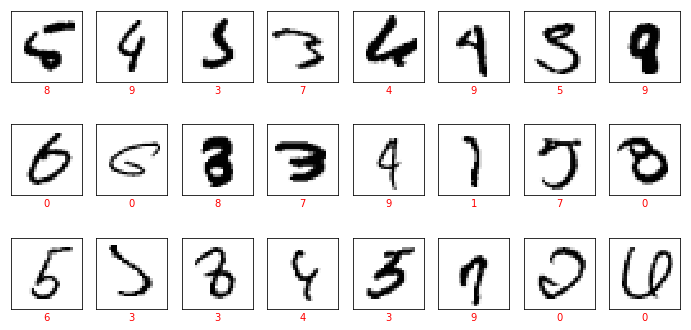

In [18]:
predictions = np.argmax(model.predict(test_imgs), axis=1)
wrongs = [i for i in range(len(predictions)) if predictions[i] != test_lbs[i]]

plt.figure(figsize=(12, 8))
for i in range(24):
    plt.subplot(4, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test[wrongs[i]][0].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(str(predictions[wrongs[i]]), color='red')